In [1]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from numpy import mean
from numpy import std
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df = pd.read_excel(r"Ambulance_Patient_Database_11Nov20.xlsx")
df.replace("#", 0, inplace=True)
df = df.round(decimals=2)
df

,Code,LGA,Total Calls,Over 75yrs,Low income households (households in bottom 40% of income distribution under financial stress from mortgage or rent,Estimated number of people aged 15 years and over with fair or poor self-assessed health (modelled estimates) (Number),Estimated number of people with diabetes mellitus\n (modelled estimates) (Number),Estimated number of people with mental and behavioural problems\n (modelled estimates) (Number),"Estimated number of people with heart, stroke and vascular disease\n (modelled estimates) (Number)","Estimated number of people aged 18 years and over with high or very high psychological distress, based on the Kessler 10 Scale (K10)\n (modelled estimates) (Number)",...,"Admissions for eye and adnexa diseases, persons \n- All hospitals (Number)","Admissions for ear and mastoid process diseases, persons \n- All hospitals (Number)","Admissions for circulatory system diseases, persons \n- All hospitals (Number)","Admissions for ischaemic heart disease, persons \n- All hospitals (Number)","Admissions for heart failure, persons \n- All hospitals (Number)","Admissions for stroke, persons \n- All hospitals (Number)","Admissions for respiratory system diseases, persons \n- All hospitals (Number)","Admissions for digestive system diseases, persons \n- All hospitals (Number)","Admissions for musculoskeletal system and connective tissue diseases, persons \n- All hospitals (Number)",Higher Education
0,20110,Alpine (S),3580,1303,482,1763.05,696.48,2787.80,819.14,1229.64,...,199.13,27.30,435.13,124.59,0.00,0.00,289.36,647.13,411.94,4578
1,20260,Ararat (RC),3358,1231,338,1750.77,793.82,2526.24,830.17,1132.78,...,239.86,28.16,348.82,106.74,30.39,0.00,280.37,574.28,442.02,3409
2,20570,Ballarat (C),29239,8256,4985,14355.00,4780.50,24018.26,5665.85,11411.28,...,1564.42,422.36,2798.53,811.87,301.64,246.29,2533.52,4897.44,3256.05,37294
3,20660,Banyule (C),35953,10734,3692,12490.00,5293.00,26098.00,6182.00,11072.00,...,2314.00,402.00,3519.00,751.00,469.00,357.00,2606.00,7841.00,3948.00,54385
4,20740,Bass Coast (S),12235,4113,1738,5873.04,2287.49,7580.32,2468.70,3755.29,...,805.28,114.36,1178.15,373.85,137.70,0.00,854.80,2169.21,1259.77,11577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,27170,Wodonga (C),9556,2645,1689,5005.00,1840.00,8566.00,1783.00,4093.00,...,555.00,112.00,1138.00,334.00,133.00,0.00,834.00,2114.00,1293.00,13943
75,27260,Wyndham (C),35626,7465,9035,23586.15,9654.04,38033.65,8258.46,24325.81,...,1594.90,467.71,3310.83,1078.16,323.55,349.54,3348.12,9012.33,3926.49,80255
76,27350,Yarra (C),30412,4600,3551,10604.75,3197.50,22512.52,2888.08,8844.83,...,1031.49,153.50,1182.38,248.39,134.47,94.89,1207.57,3657.44,1576.12,48023
77,27450,Yarra Ranges (S),28310,10330,4593,17603.81,5630.91,34996.01,6973.37,17303.88,...,2390.33,479.56,3470.50,900.74,360.22,332.18,3131.29,8120.36,4603.53,59192


In [3]:
X = df.iloc[:,3:]
y = df.iloc[:,2]
colm = X.columns

In [4]:
#for c in colm:
#    print(c)

In [5]:
#col_df = pd.read_excel(r"col_name_change.xlsm")
#col_df["Unnamed: 2"]

In [6]:
#X.rename(columns = {"Low income households (households in bottom 40% of income distribution under financial stress from mortgage or rent" : "Under Financial Stress",
#                  "Estimated number of people aged 15 years and over with fair or poor self-assessed health (modelled estimates) (Number)": "Over 15 yrs Poor Self-assessed Health", 
#                  "Estimated number of people with diabetes mellitus (modelled estimates) (Number)": "Diabetes Mellitus",
#                  "Estimated number of people with mental and behavioural problems (modelled estimates) (Number)": "Mental & Behavorial Problems",
#                  "Estimated number of people with heart, stroke and vascular disease (modelled estimates) (Number)" : "Vascular, heart/stroke" ,
#                  "Estimated number of people aged 18 years and over with high or very high psychological distress, based on the Kessler 10 Scale (K10) (modelled estimates) (Number)" : "High Kessler",
#                  "Estimated number of people aged 18 years and over who had high blood pressure  (modelled estimates) (Number)" : "High Blood Pressure",
#                  "Estimated number of people aged 18 years and over who were overweight (but not obese)  (modelled estimates) (Number)" : "Overweight not Obese",\
#                  "Estimated number of people aged 18 years and over who were obese (modelled estimates) (Number)" : "Obese", 
#                  "Estimated number of people aged 18 years and over who were current smokers (modelled estimates) (Number)" : "Current Smokers", 
#                  "Estimated number of people aged 18 years and over who consumed more than two standard alcoholic drinks per day on average (modelled estimates) (Number)" : "Alcohol Consumption > 2 perwk" ,
#                  "Estimated number of people aged 18 years and over with adequate fruit intake (modelled estimates) (Number)" : "Adequate Fruit Intake", 
#                  "Estimated population, aged 18 years and over, who undertook low, very low or no exercise in the previous week (modelled estimates) (Number)" : "Little or No Excerise", 
#                  "Total admissions (excluding same-day admissions for renal dialysis) - All hospitals (Number)" : "Total Admissions" , 
#                  "Admissions for mental health related conditions, persons - All hospitals (Number)" : "Admissions for mental health", 
#                  "Admissions for mood affective disorders, persons - All hospitals (Number)" : "Admissions Mood Disorder", 
##                  "Admissions for eye and adnexa diseases, persons - All hospitals (Number)" : "Admissions Eye/Adnexa", 
#                  "Admissions for ear and mastoid process diseases, persons - All hospitals (Number)" : "Admission Ear/Mastoid", 
#                  "Admissions for circulatory system diseases, persons - All hospitals (Number)" :"Admissions circulatory diseases" , 
#                  "Admissions for ischaemic heart disease, persons - All hospitals (Number)" : "Admission ischaemic heart diseases", 
#                  "Admissions for heart failure, persons - All hospitals (Number)" : "Admission Heart Failure", 
#                  "Admissions for stroke, persons - All hospitals (Number)" : "Admission Stroke", 
#                  "Admissions for respiratory system diseases, persons - All hospitals (Number)" : "Admission rispiratory diseases", 
#                  "Admissions for digestive system diseases, persons - All hospitals (Number)" : "Admission digestive diseases", 
#                  "Admissions for musculoskeletal system and connective tissue diseases, persons - All hospitals (Number)" : "Admission connective tissue diseases" }, inplace=True)

In [7]:
X

,Over 75yrs,Low income households (households in bottom 40% of income distribution under financial stress from mortgage or rent,Estimated number of people aged 15 years and over with fair or poor self-assessed health (modelled estimates) (Number),Estimated number of people with diabetes mellitus\n (modelled estimates) (Number),Estimated number of people with mental and behavioural problems\n (modelled estimates) (Number),"Estimated number of people with heart, stroke and vascular disease\n (modelled estimates) (Number)","Estimated number of people aged 18 years and over with high or very high psychological distress, based on the Kessler 10 Scale (K10)\n (modelled estimates) (Number)",Estimated number of people aged 18 years and over who had high blood pressure (modelled estimates) (Number),Estimated number of people aged 18 years and over who were overweight (but not obese) (modelled estimates) (Number),Estimated number of people aged 18 years and over who were obese\n (modelled estimates) (Number),...,"Admissions for eye and adnexa diseases, persons \n- All hospitals (Number)","Admissions for ear and mastoid process diseases, persons \n- All hospitals (Number)","Admissions for circulatory system diseases, persons \n- All hospitals (Number)","Admissions for ischaemic heart disease, persons \n- All hospitals (Number)","Admissions for heart failure, persons \n- All hospitals (Number)","Admissions for stroke, persons \n- All hospitals (Number)","Admissions for respiratory system diseases, persons \n- All hospitals (Number)","Admissions for digestive system diseases, persons \n- All hospitals (Number)","Admissions for musculoskeletal system and connective tissue diseases, persons \n- All hospitals (Number)",Higher Education
0,1303,482,1763.05,696.48,2787.80,819.14,1229.64,2804.49,3702.52,3942.70,...,199.13,27.30,435.13,124.59,0.00,0.00,289.36,647.13,411.94,4578
1,1231,338,1750.77,793.82,2526.24,830.17,1132.78,2483.79,3475.21,3509.40,...,239.86,28.16,348.82,106.74,30.39,0.00,280.37,574.28,442.02,3409
2,8256,4985,14355.00,4780.50,24018.26,5665.85,11411.28,19126.54,28649.17,31782.62,...,1564.42,422.36,2798.53,811.87,301.64,246.29,2533.52,4897.44,3256.05,37294
3,10734,3692,12490.00,5293.00,26098.00,6182.00,11072.00,21961.00,37191.00,28518.00,...,2314.00,402.00,3519.00,751.00,469.00,357.00,2606.00,7841.00,3948.00,54385
4,4113,1738,5873.04,2287.49,7580.32,2468.70,3755.29,7809.28,10028.07,10715.45,...,805.28,114.36,1178.15,373.85,137.70,0.00,854.80,2169.21,1259.77,11577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,2645,1689,5005.00,1840.00,8566.00,1783.00,4093.00,7188.00,10745.00,12634.00,...,555.00,112.00,1138.00,334.00,133.00,0.00,834.00,2114.00,1293.00,13943
75,7465,9035,23586.15,9654.04,38033.65,8258.46,24325.81,33534.10,60243.43,58116.82,...,1594.90,467.71,3310.83,1078.16,323.55,349.54,3348.12,9012.33,3926.49,80255
76,4600,3551,10604.75,3197.50,22512.52,2888.08,8844.83,14567.53,28984.87,21286.78,...,1031.49,153.50,1182.38,248.39,134.47,94.89,1207.57,3657.44,1576.12,48023
77,10330,4593,17603.81,5630.91,34996.01,6973.37,17303.88,27136.83,44803.84,40023.46,...,2390.33,479.56,3470.50,900.74,360.22,332.18,3131.29,8120.36,4603.53,59192


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [9]:
m = RandomForestRegressor(max_depth=20, n_estimators=300, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)

def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)
fi = rf_feat_importance(m, X_train); fi[:10]
fi.to_csv("All_feature_import_test.csv")

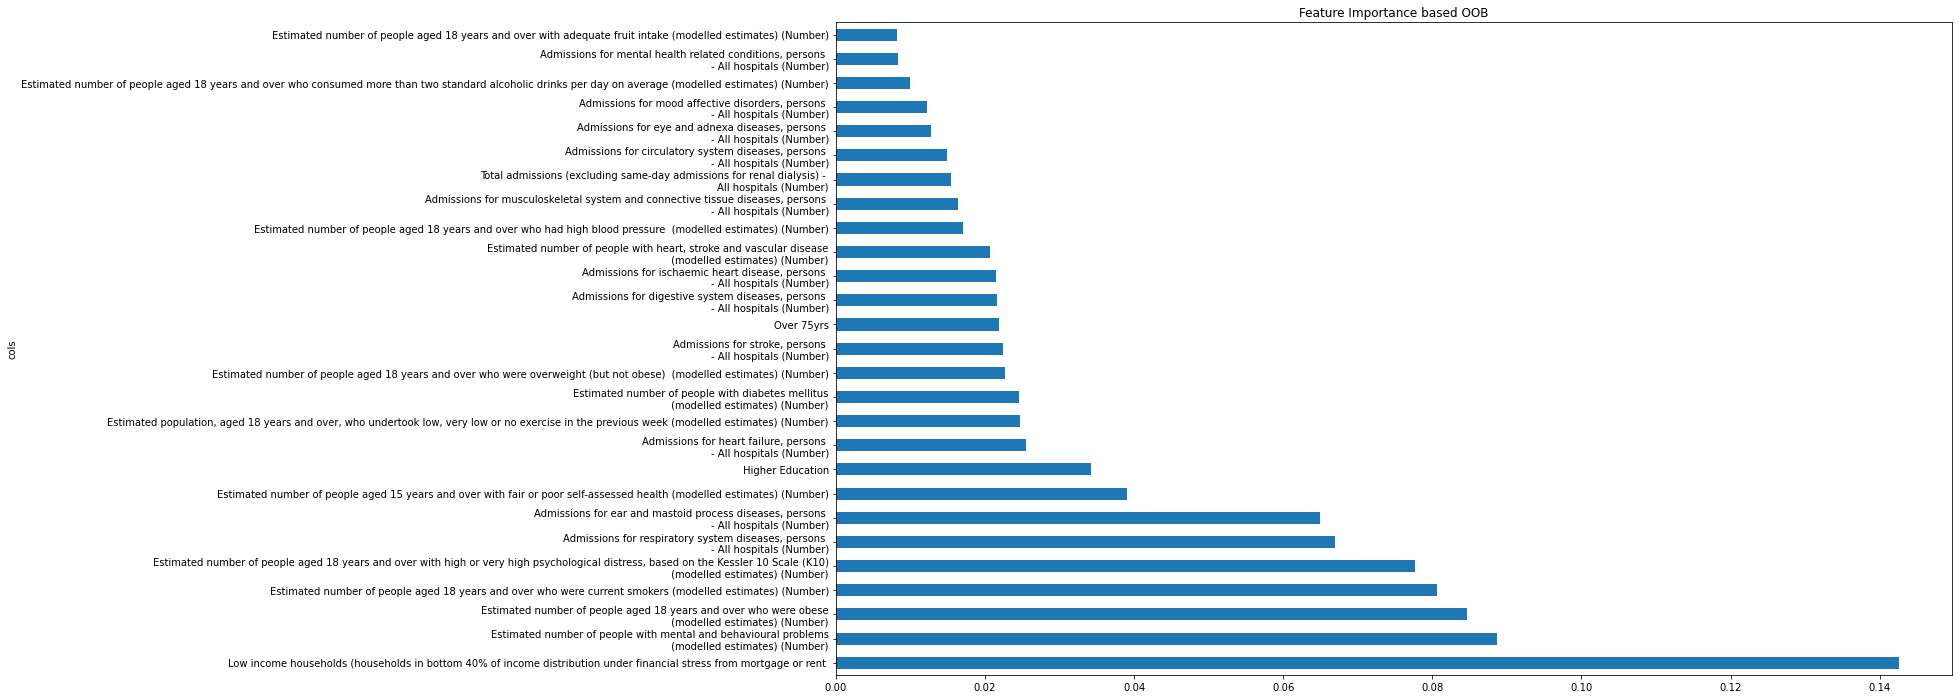

In [10]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(20,12), legend=False, title="Feature Importance based OOB")
plot_fi(fi[:30])
plt.savefig("RForrest_import_feature.png")

In [11]:
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
n_scores = cross_val_score(m, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


MAE: -3102.258 (1647.984)


In [12]:
score=cross_val_score(m,X,y,cv=cv,scoring="r2",n_jobs=17)
print(mean(score))

0.884378541142042


In [13]:
print(m.score(X,y))

0.9228978718820415


In [14]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.to_csv("VIF_Full_features.csv")

In [15]:
predict = m.predict(X_test)


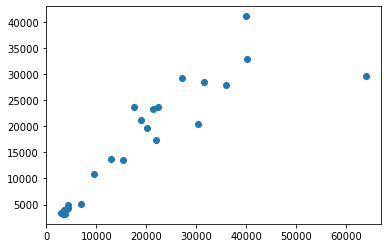

In [16]:
plt.scatter(y_test, predict, )

In [17]:
pred_df= X_test
pred_df["Predicted Calls"] = predict
pred_df["Predicted Calls"] = round(pred_df["Predicted Calls"])
pred_df = pred_df.sort_index()
pred = pred_df[["Over 75yrs" ,'Predicted Calls' ]]


/opt/anaconda3/envs/PythonAdvanced/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/PythonAdvanced/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
sniff_df = pd.merge(pred ,df, on="Over 75yrs", how="left")

In [19]:
sniff_df = sniff_df[["LGA", "Total Calls ", "Predicted Calls"]]

In [20]:
sniff_df["Variance"] = sniff_df["Total Calls "] - sniff_df["Predicted Calls"]

In [21]:
sniff_df["Variance as Percentage"] = round(sniff_df["Variance"]/sniff_df["Total Calls "], 2)

In [22]:
#sniff_df.to_csv('sniff_test_1stRandomstate.csv')

In [23]:
sniff_df

,LGA,Total Calls,Predicted Calls,Variance,Variance as Percentage
0,Ararat (RC),3358,3207.0,151.0,0.04
1,Banyule (C),35953,27882.0,8071.0,0.22
2,Baw Baw (S),12864,13633.0,-769.0,-0.06
3,Bayside (C),19006,21213.0,-2207.0,-0.12
4,Cardinia (S),17468,23707.0,-6239.0,-0.36
5,Central Goldfields (S),4328,4314.0,14.0,0.00
6,East Gippsland (S),15404,13531.0,1873.0,0.12
7,Frankston (C),40136,32850.0,7286.0,0.18
8,Greater Shepparton (C),21983,17328.0,4655.0,0.21
9,Hepburn (S),4101,4124.0,-23.0,-0.01


In [24]:
#sniff_df.describe().to_csv("Sniff_1ststate_stats.csv")
sniff_df.describe()

,Total Calls,Predicted Calls,Variance,Variance as Percentage
count,24.000000,24.000000,24.000000,24.000000
mean,19268.250000,17025.708333,2242.541667,0.036250
std,15423.930312,11341.637787,7694.042777,0.188652
min,2997.000000,3207.000000,-6239.000000,-0.360000
25%,4376.750000,4773.750000,-1208.250000,-0.092500
50%,18237.000000,18499.000000,-4.500000,-0.005000
75%,27965.500000,24750.750000,2199.000000,0.135000
max,63838.000000,41037.000000,34183.000000,0.540000


In [25]:
#import joblib
#joblib.dump(m, 'ambo_RFmodel.sav')

In [26]:
#fig=plt.figure()
#ax=fig.add_axes([1,4,1,4])
#ax.scatter(sniff_df["Predicted Calls"],sniff_df["LGA"], color='r')
#ax.scatter(sniff_df["Total Calls "],sniff_df["LGA"] , color='b')
#ax.set_xticklabels(sniff_df["LGA"], rotation=180, ha='right')
#ax.set_xlabel('LGA')
#ax.set_ylabel('Calls')
#ax.set_title('scatter plot')
#plt.show()

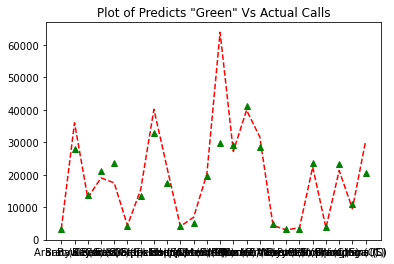

In [27]:

plt.plot(sniff_df["LGA"], sniff_df["Total Calls "], 'r--', sniff_df["LGA"], sniff_df["Predicted Calls"], 'g^')
plt.title("Plot of Predicts \"Green\" Vs Actual Calls")
plt.savefig("Predict_V_Actual_Calls.png")
plt.show()
